In [90]:
import pandas as pd
import geopandas as gpd

In [91]:
df = pd.read_excel("NFHS_5_Factsheets_Data.xls")

In [92]:

df =df[['States/UTs','Area','Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Female sterilization (%)',
        'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Male sterilization (%)']]
df =df[df.Area=='Total']
df = df.drop(columns=["Area"])
df.columns = ['states', 'female_ster','male_ster']

In [93]:
df.head()

,states,female_ster,male_ster
2,India,37.91,0.3
5,Andaman & Nicobar Islands,39.16,0.17
8,Andhra Pradesh,69.61,0.44
11,Arunachal Pradesh,18.24,0
14,Assam,8.97,0.1


In [94]:
state_name_map = {
    'Andaman & Nicobar Islands': 'Andaman & Nicobar',
    'Dadra and Nagar Haveli & Daman and Diu': 'DNHDD',  # prioritize one; see note below
    'NCT of Delhi': 'Delhi',
    'Maharastra': 'Maharashtra'

}
df['states'] = df['states'].replace(state_name_map)


In [95]:
gdf = gpd.read_file("INDIA_STATES.geojson")

# Replace STNAME values to merge
gdf['STNAME_SH'] = gdf['STNAME_SH'].replace({
    'Dadra & Nagar Haveli': 'Daman & Diu'
    
})

# Dissolve rows with same state name into a single geometry
gdf = gdf.dissolve(by='STNAME_SH', as_index=False)
gdf['STNAME_SH'] = gdf['STNAME_SH'].replace('Daman & Diu', 'DNHDD')




In [96]:
# merge dataframes on state names
final = gdf.merge(df, left_on='STNAME_SH', right_on='states')


In [97]:
final.columns

Index(['STNAME_SH', 'geometry', 'STNAME', 'STCODE11', 'Shape_Length',
       'Shape_Area', 'OBJECTID_1', 'OBJECTID', 'State_LGD', 'Shape_Leng',
       'MaxSimpTol', 'MinSimpTol', 'states', 'female_ster', 'male_ster'],
      dtype='object')

In [98]:
final

,STNAME_SH,geometry,STNAME,STCODE11,Shape_Length,Shape_Area,OBJECTID_1,OBJECTID,State_LGD,Shape_Leng,MaxSimpTol,MinSimpTol,states,female_ster,male_ster
0,Andaman & Nicobar,"MULTIPOLYGON (((92.56474 10.80546, 92.57249 10...",ANDAMAN & NICOBAR,35,4.249865e+06,7.613319e+09,21,21,35,4.249865e+06,300,300,Andaman & Nicobar,39.16,0.17
1,Andhra Pradesh,"MULTIPOLYGON (((80.79252 15.75617, 80.79352 15...",ANDHRA PRADESH,37,5.257129e+06,1.773080e+11,31,31,28,5.257129e+06,300,300,Andhra Pradesh,69.61,0.44
2,Arunachal Pradesh,"POLYGON ((96.09428 29.45477, 96.08208 29.46173...",ARUNACHAL PRADESH,12,2.937127e+06,1.057817e+11,1,1,12,2.937127e+06,300,300,Arunachal Pradesh,18.24,0
3,Assam,"POLYGON ((95.97166 27.96254, 95.8238 27.97157,...",ASSAM,18,3.409654e+06,9.816875e+10,2,2,18,3.409654e+06,300,300,Assam,8.97,0.1
4,Bihar,"POLYGON ((84.11673 27.51951, 84.10796 27.52163...",BIHAR,10,3.102534e+06,1.164765e+11,22,22,10,3.102534e+06,300,300,Bihar,34.76,0.12
5,Chandigarh,"POLYGON ((76.78275 30.78923, 76.77148 30.79527...",CHANDIGARH,04,6.571123e+04,1.561981e+08,3,3,4,6.571123e+04,300,300,Chandigarh,18.99,0.31
6,Chhattisgarh,"POLYGON ((83.32988 24.10169, 83.32147 24.10603...",CHHATTISGARH,22,3.449518e+06,1.565398e+11,4,4,22,3.449518e+06,300,300,Chhattisgarh,47.53,0.78
7,DNHDD,"MULTIPOLYGON (((73.2151 20.11806, 73.21066 20....",DAMAN & DIU,25,8.710005e+04,1.055022e+08,34,34,25,8.710005e+04,300,300,DNHDD,41.64,0.15
8,Delhi,"POLYGON ((77.08754 28.87546, 77.0824 28.88381,...",DELHI,07,2.609922e+05,1.932519e+09,5,5,7,2.609922e+05,300,300,Delhi,18,0.22
9,Goa,"POLYGON ((73.85648 15.80076, 73.84674 15.78644...",GOA,30,4.333050e+05,3.921762e+09,6,6,30,4.333050e+05,300,300,Goa,29.94,0


In [99]:
final

,STNAME_SH,geometry,STNAME,STCODE11,Shape_Length,Shape_Area,OBJECTID_1,OBJECTID,State_LGD,Shape_Leng,MaxSimpTol,MinSimpTol,states,female_ster,male_ster
0,Andaman & Nicobar,"MULTIPOLYGON (((92.56474 10.80546, 92.57249 10...",ANDAMAN & NICOBAR,35,4.249865e+06,7.613319e+09,21,21,35,4.249865e+06,300,300,Andaman & Nicobar,39.16,0.17
1,Andhra Pradesh,"MULTIPOLYGON (((80.79252 15.75617, 80.79352 15...",ANDHRA PRADESH,37,5.257129e+06,1.773080e+11,31,31,28,5.257129e+06,300,300,Andhra Pradesh,69.61,0.44
2,Arunachal Pradesh,"POLYGON ((96.09428 29.45477, 96.08208 29.46173...",ARUNACHAL PRADESH,12,2.937127e+06,1.057817e+11,1,1,12,2.937127e+06,300,300,Arunachal Pradesh,18.24,0
3,Assam,"POLYGON ((95.97166 27.96254, 95.8238 27.97157,...",ASSAM,18,3.409654e+06,9.816875e+10,2,2,18,3.409654e+06,300,300,Assam,8.97,0.1
4,Bihar,"POLYGON ((84.11673 27.51951, 84.10796 27.52163...",BIHAR,10,3.102534e+06,1.164765e+11,22,22,10,3.102534e+06,300,300,Bihar,34.76,0.12
5,Chandigarh,"POLYGON ((76.78275 30.78923, 76.77148 30.79527...",CHANDIGARH,04,6.571123e+04,1.561981e+08,3,3,4,6.571123e+04,300,300,Chandigarh,18.99,0.31
6,Chhattisgarh,"POLYGON ((83.32988 24.10169, 83.32147 24.10603...",CHHATTISGARH,22,3.449518e+06,1.565398e+11,4,4,22,3.449518e+06,300,300,Chhattisgarh,47.53,0.78
7,DNHDD,"MULTIPOLYGON (((73.2151 20.11806, 73.21066 20....",DAMAN & DIU,25,8.710005e+04,1.055022e+08,34,34,25,8.710005e+04,300,300,DNHDD,41.64,0.15
8,Delhi,"POLYGON ((77.08754 28.87546, 77.0824 28.88381,...",DELHI,07,2.609922e+05,1.932519e+09,5,5,7,2.609922e+05,300,300,Delhi,18,0.22
9,Goa,"POLYGON ((73.85648 15.80076, 73.84674 15.78644...",GOA,30,4.333050e+05,3.921762e+09,6,6,30,4.333050e+05,300,300,Goa,29.94,0


In [100]:
final['female_ster'] = pd.to_numeric(final['female_ster'], errors='coerce')
final['male_ster'] = pd.to_numeric(final['male_ster'], errors='coerce')


In [101]:
final.male_ster.unique()

array([0.17, 0.44, 0.  , 0.1 , 0.12, 0.31, 0.78, 0.15, 0.22, 0.93, 3.33,
       0.33, 0.27, 0.02, 0.05, 0.38, 0.73, 0.04, 0.32, 0.45, 0.25, 1.71,
       0.06, 1.96, 0.03, 0.67])

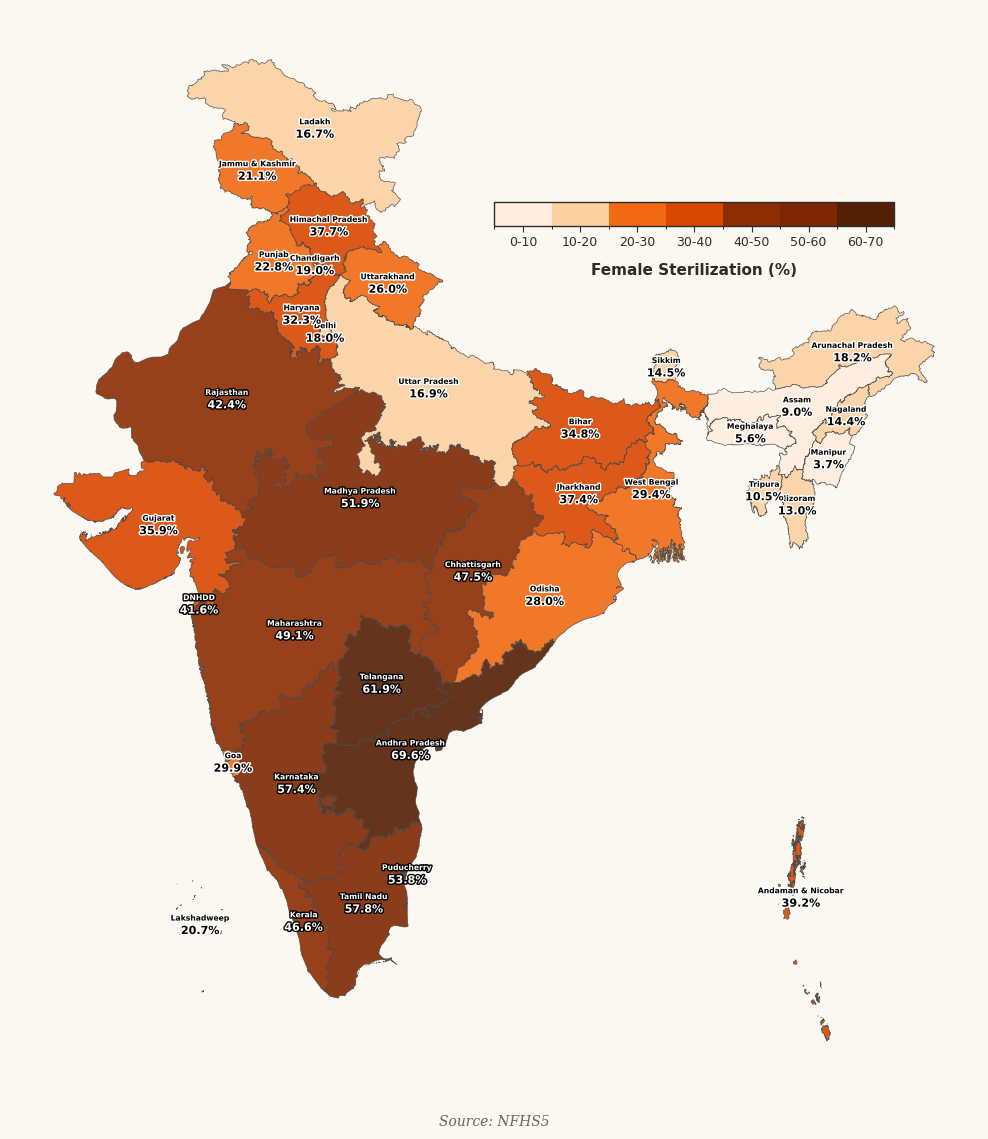

In [102]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib.colors import Normalize, LinearSegmentedColormap, BoundaryNorm
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')

def create_stunting_map(final_df):
    fig = plt.figure(figsize=(16, 12))
    fig.patch.set_facecolor('#faf8f0')

    ax_map = plt.axes([0.05, 0.05, 0.9, 0.9])
    ax_map.set_facecolor('#faf8f0')

    # Updated color list for up to 70%
    colors_list = ['#feedde', '#fdd0a2', '#f16913', '#d94801', '#8c2d04', '#7f2704', '#542005']
    
    # Define bin boundaries
    bounds = [0, 10, 20, 30, 40, 50, 60, 70]

    custom_cmap = LinearSegmentedColormap.from_list('female_ster_cmap', colors_list, N=len(colors_list))
    norm = BoundaryNorm(bounds, custom_cmap.N)

    def get_color_for_value(value):
        if pd.isnull(value):
            return (0.95, 0.95, 0.95, 1.0)  # Light gray
        for i, upper in enumerate(bounds[1:]):
            if value < upper:
                return custom_cmap(i / (len(bounds)-2))
        return custom_cmap((len(bounds)-2) / (len(bounds)-2))

    colors = final_df['female_ster'].apply(get_color_for_value)

    final_df.plot(
        ax=ax_map,
        color=colors.tolist(),
        edgecolor='#4a4a4a',
        linewidth=0.5,
        alpha=0.9
    )

    def get_text_color(value):
        if pd.isnull(value):
            return 'black'
        return 'white' if value >= 40 else 'black'

    for _, row in final_df.iterrows():
        if pd.notnull(row['STNAME_SH']):
            point = row['geometry'].centroid
            text_color = get_text_color(row['female_ster'])
            outline_color = 'black' if text_color == 'white' else 'white'

            ax_map.text(
                point.x, point.y + 0.2, row['STNAME_SH'],
                ha='center', va='center', fontsize=5.5, fontweight='bold',
                color=text_color, fontfamily='sans-serif',
                path_effects=[path_effects.withStroke(linewidth=2, foreground=outline_color)]
            )

            if pd.notnull(row['female_ster']):
                ax_map.text(
                    point.x, point.y - 0.2, f"{row['female_ster']:.1f}%",
                    ha='center', va='center', fontsize=8, fontweight='bold',
                    color=text_color, fontfamily='sans-serif',
                    path_effects=[path_effects.withStroke(linewidth=2, foreground=outline_color)]
                )

    ax_map.set_title(
        '',
        fontsize=24, fontweight='bold', fontfamily='serif',
        pad=30, color='#2c2c2c',
        path_effects=[path_effects.withStroke(linewidth=3, foreground='white')]
    )
    ax_map.set_axis_off()

    sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
    sm._A = []

    cbar_ax = fig.add_axes([0.50, 0.77, 0.25, 0.02])
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', boundaries=bounds, ticks=bounds)
    cbar.ax.tick_params(labelsize=9, colors='#2c2c2c', length=4)
    cbar.set_label('Female Sterilization (%)', fontsize=11, fontweight='bold',
                   color='#2c2c2c', labelpad=10)
    cbar.outline.set_edgecolor('#2c2c2c')
    cbar.outline.set_linewidth(1)
    tick_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
    cbar.set_ticks([5, 15, 25, 35, 45, 55, 65])
    cbar.set_ticklabels(tick_labels)

    fig.text(
        0.63, 0.85,
        '',
        ha='center', va='center',
        fontsize=16, fontweight='bold', fontfamily='serif', color='#2c2c2c',
        path_effects=[path_effects.withStroke(linewidth=3, foreground='white')]
    )

    plt.figtext(
        0.5, 0.02,
        'Source: NFHS5',
        ha='center', fontsize=10, color='#666666',
        style='italic', fontfamily='serif'
    )

    ax_map.grid(True, alpha=0.1, color='gray', linewidth=0.5)
    plt.tight_layout()
    return fig

# === Execution ===
if __name__ == "__main__":
    map_fig = create_stunting_map(final)

    map_fig.savefig('female_sterilization_map.png', dpi=300, bbox_inches='tight',
                    facecolor=map_fig.get_facecolor(), edgecolor='none')
    map_fig.savefig('female_sterilization_map.pdf', bbox_inches='tight',
                    facecolor=map_fig.get_facecolor(), edgecolor='none')

    plt.show()


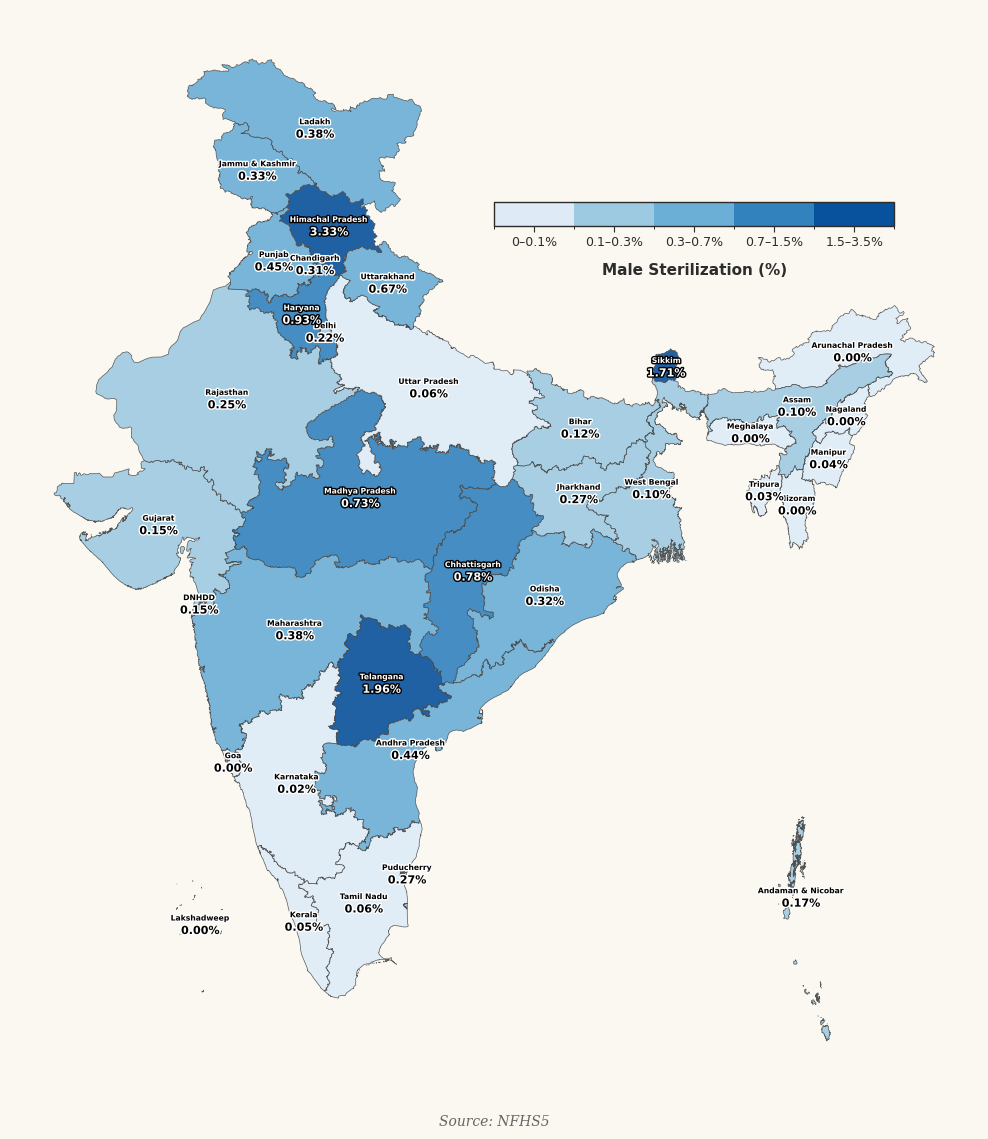

In [103]:
def create_male_ster_map(final_df):
    fig = plt.figure(figsize=(16, 12))
    fig.patch.set_facecolor('#faf8f0')

    ax_map = plt.axes([0.05, 0.05, 0.9, 0.9])
    ax_map.set_facecolor('#faf8f0')

    # Define blue color range for male sterilization
    colors_list = ['#deebf7', '#9ecae1', '#6baed6', '#3182bd', '#08519c']
    bounds = [0, 0.1, 0.3, 0.7, 1.5, 3.5]

    custom_cmap = LinearSegmentedColormap.from_list('male_ster_cmap', colors_list, N=len(colors_list))
    norm = BoundaryNorm(bounds, custom_cmap.N)

    def get_color_for_value(value):
        if pd.isnull(value):
            return (0.95, 0.95, 0.95, 1.0)
        for i, upper in enumerate(bounds[1:]):
            if value < upper:
                return custom_cmap(i / (len(bounds)-2))
        return custom_cmap((len(bounds)-2) / (len(bounds)-2))

    colors = final_df['male_ster'].apply(get_color_for_value)

    final_df.plot(
        ax=ax_map,
        color=colors.tolist(),
        edgecolor='#4a4a4a',
        linewidth=0.5,
        alpha=0.9
    )

    def get_text_color(value):
        if pd.isnull(value):
            return 'black'
        return 'white' if value >= 0.7 else 'black'

    for _, row in final_df.iterrows():
        if pd.notnull(row['STNAME_SH']):
            point = row['geometry'].centroid
            text_color = get_text_color(row['male_ster'])
            outline_color = 'black' if text_color == 'white' else 'white'

            ax_map.text(
                point.x, point.y + 0.2, row['STNAME_SH'],
                ha='center', va='center', fontsize=5.5, fontweight='bold',
                color=text_color, fontfamily='sans-serif',
                path_effects=[path_effects.withStroke(linewidth=2, foreground=outline_color)]
            )

            if pd.notnull(row['male_ster']):
                ax_map.text(
                    point.x, point.y - 0.2, f"{row['male_ster']:.2f}%",
                    ha='center', va='center', fontsize=8, fontweight='bold',
                    color=text_color, fontfamily='sans-serif',
                    path_effects=[path_effects.withStroke(linewidth=2, foreground=outline_color)]
                )

    ax_map.set_title(
        '',
        fontsize=24, fontweight='bold', fontfamily='serif',
        pad=30, color='#2c2c2c',
        path_effects=[path_effects.withStroke(linewidth=3, foreground='white')]
    )
    ax_map.set_axis_off()

    sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
    sm._A = []

    cbar_ax = fig.add_axes([0.50, 0.77, 0.25, 0.02])
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', boundaries=bounds, ticks=bounds)
    cbar.ax.tick_params(labelsize=9, colors='#2c2c2c', length=4)
    cbar.set_label('Male Sterilization (%)', fontsize=11, fontweight='bold',
                   color='#2c2c2c', labelpad=10)
    cbar.outline.set_edgecolor('#2c2c2c')
    cbar.outline.set_linewidth(1)

    tick_labels = ['0–0.1%', '0.1–0.3%', '0.3–0.7%', '0.7–1.5%', '1.5–3.5%']
    cbar.set_ticks([0.05, 0.2, 0.5, 1.1, 2.5])
    cbar.set_ticklabels(tick_labels)

    fig.text(
        0.63, 0.85,
        '',
        ha='center', va='center',
        fontsize=16, fontweight='bold', fontfamily='serif', color='#2c2c2c',
        path_effects=[path_effects.withStroke(linewidth=3, foreground='white')]
    )

    plt.figtext(
        0.5, 0.02,
        'Source: NFHS5',
        ha='center', fontsize=10, color='#666666',
        style='italic', fontfamily='serif'
    )

    ax_map.grid(True, alpha=0.1, color='gray', linewidth=0.5)
    plt.tight_layout()
    return fig


if __name__ == "__main__":
    male_fig = create_male_ster_map(final)
    male_fig.savefig('male_sterilization_map.png', dpi=300, bbox_inches='tight',
                     facecolor=male_fig.get_facecolor(), edgecolor='none')
    male_fig.savefig('male_sterilization_map.pdf', bbox_inches='tight',
                     facecolor=male_fig.get_facecolor(), edgecolor='none')
    plt.show()


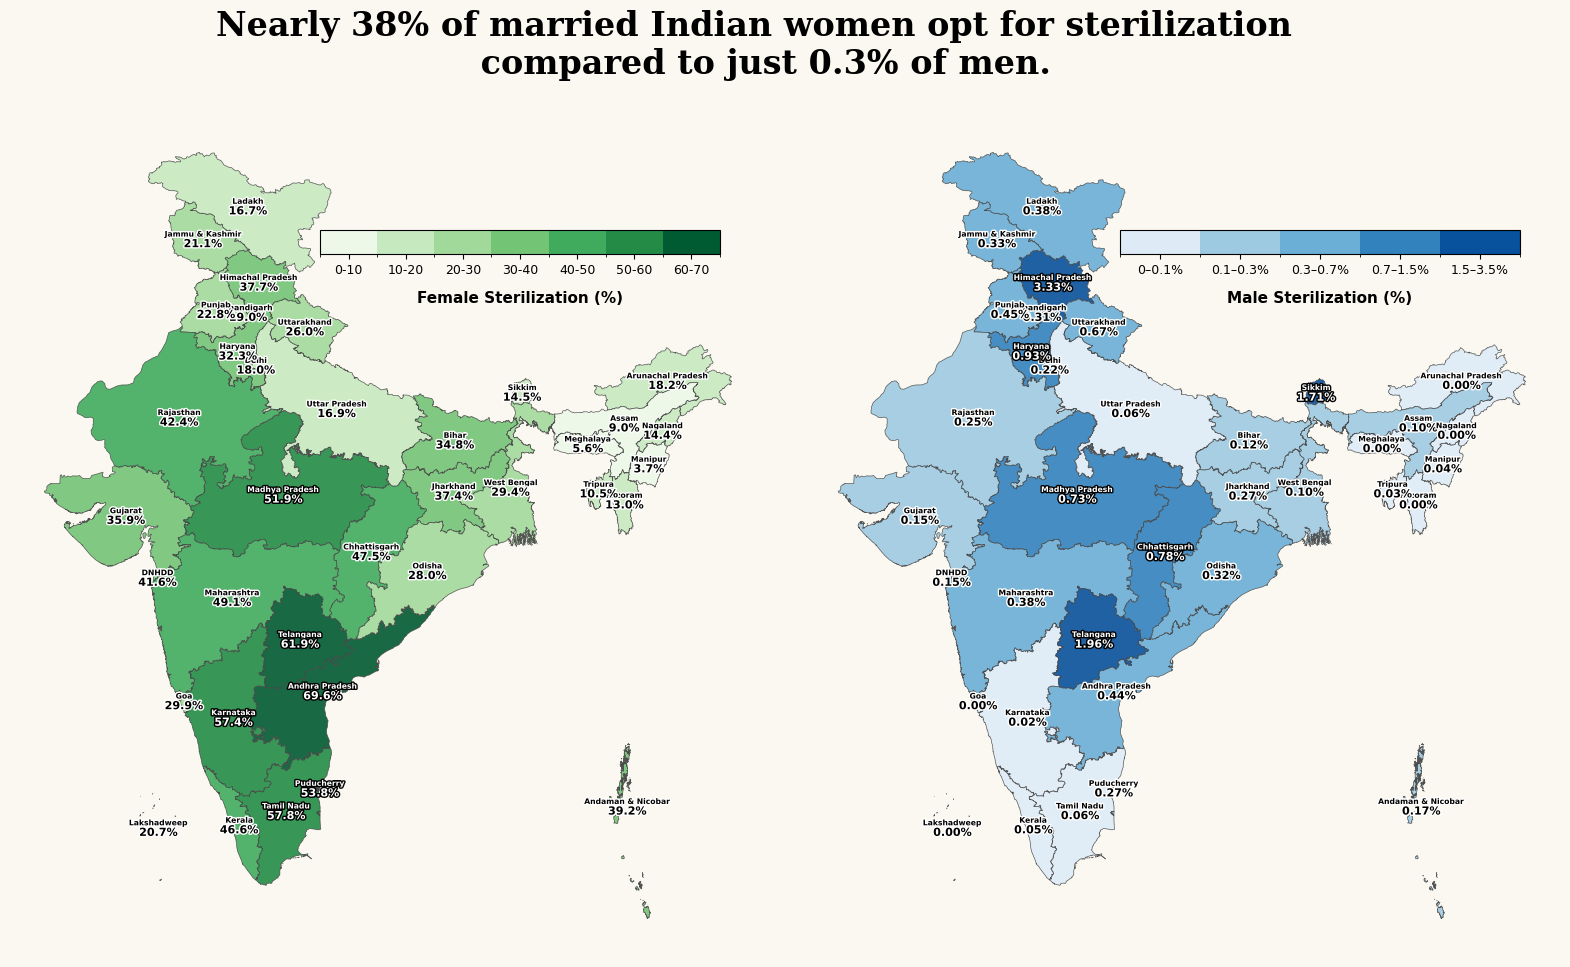

In [104]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib.colors import Normalize, LinearSegmentedColormap, BoundaryNorm
import matplotlib.patheffects as path_effects
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')


def plot_sterilization_map(final_df, ax, column, cmap_colors, bounds, label, tick_labels, value_format='.1f'):
    ax.set_facecolor('#faf8f0')
    cmap = LinearSegmentedColormap.from_list(f'{column}_cmap', cmap_colors, N=len(cmap_colors))
    norm = BoundaryNorm(bounds, cmap.N)

    def get_color_for_value(value):
        if pd.isnull(value):
            return (0.95, 0.95, 0.95, 1.0)
        for i, upper in enumerate(bounds[1:]):
            if value < upper:
                return cmap(i / (len(bounds) - 2))
        return cmap((len(bounds) - 2) / (len(bounds) - 2))

    colors = final_df[column].apply(get_color_for_value)

    final_df.plot(
        ax=ax,
        color=colors.tolist(),
        edgecolor='#4a4a4a',
        linewidth=0.5,
        alpha=0.9
    )

    def get_text_color(value):
        if pd.isnull(value):
            return 'black'
        return 'white' if value >= bounds[-3] else 'black'

    for _, row in final_df.iterrows():
        if pd.notnull(row['STNAME_SH']):
            point = row['geometry'].centroid
            val = row[column]
            text_color = get_text_color(val)
            outline_color = 'black' if text_color == 'white' else 'white'

            ax.text(
                point.x, point.y + 0.2, row['STNAME_SH'],
                ha='center', va='center', fontsize=5.5, fontweight='bold',
                color=text_color, fontfamily='sans-serif',
                path_effects=[path_effects.withStroke(linewidth=2, foreground=outline_color)]
            )

            if pd.notnull(val):
                ax.text(
                    point.x, point.y - 0.2, f"{val:{value_format}}%",
                    ha='center', va='center', fontsize=8, fontweight='bold',
                    color=text_color, fontfamily='sans-serif',
                    path_effects=[path_effects.withStroke(linewidth=2, foreground=outline_color)]
                )

    ax.set_title('', fontsize=20, fontweight='bold', fontfamily='serif')
    ax.set_axis_off()

    return cmap, norm


def create_combined_figure(final_df):
    fig, axes = plt.subplots(1, 2, figsize=(20, 12), facecolor='#faf8f0', 
                            gridspec_kw={'wspace': 0.05})  # Reduced wspace from default 0.2 to 0.05
    

    # Female sterilization map (left)
    # female_colors = ['#fde0dd', '#fcc5c0', '#fa9fb5', '#f768a1', '#dd3497', '#ae017e', '#7a0177']
    # female_colors = ['#f3e5f5', '#e1bee7', '#ce93d8', '#ba68c8', '#ab47bc', '#8e24aa', '#6a1b9a']
    # female_colors = ['#ffe5d9', '#fcbba1', '#fc9272', '#fb6a4a', '#ef3b2c', '#cb181d', '#99000d']
    female_colors = ['#edf8e9', '#c7e9c0', '#a1d99b', '#74c476', '#41ab5d', '#238b45', '#005a32']




    # female_colors = ['#fff5eb', '#fee6ce', '#fdd0a2', '#fdae6b', '#fd8d3c', '#e6550d', '#a63603']

    # female_colors = ['#feedde', '#fdd0a2', '#f16913', '#d94801', '#8c2d04', '#7f2704', '#542005']
    female_bounds = [0, 10, 20, 30, 40, 50, 60, 70]
    female_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
    cmap_f, norm_f = plot_sterilization_map(
        final_df, axes[0], 'female_ster', female_colors, female_bounds,
        'Female Sterilization (%)', female_labels, value_format='.1f'
    )

    # Male sterilization map (right)
    male_colors = ['#deebf7', '#9ecae1', '#6baed6', '#3182bd', '#08519c']
    male_bounds = [0, 0.1, 0.3, 0.7, 1.5, 3.5]
    male_labels = ['0–0.1%', '0.1–0.3%', '0.3–0.7%', '0.7–1.5%', '1.5–3.5%']
    cmap_m, norm_m = plot_sterilization_map(
        final_df, axes[1], 'male_ster', male_colors, male_bounds,
        'Male Sterilization (%)', male_labels, value_format='.2f'
    )

    # Female colorbar
    cbar_ax1 = fig.add_axes([0.28, 0.73, 0.20, 0.02])
    sm_f = plt.cm.ScalarMappable(cmap=cmap_f, norm=norm_f)
    sm_f._A = []
    cbar1 = fig.colorbar(sm_f, cax=cbar_ax1, orientation='horizontal', boundaries=female_bounds)
    cbar1.set_ticks([5, 15, 25, 35, 45, 55, 65])
    cbar1.set_ticklabels(female_labels)
    cbar1.set_label('Female Sterilization (%)', fontsize=11, fontweight='bold', labelpad=10)
    cbar1.ax.tick_params(labelsize=9)

    # Male colorbar
    cbar_ax2 = fig.add_axes([0.68, 0.73, 0.20, 0.02])
    sm_m = plt.cm.ScalarMappable(cmap=cmap_m, norm=norm_m)
    sm_m._A = []
    cbar2 = fig.colorbar(sm_m, cax=cbar_ax2, orientation='horizontal', boundaries=male_bounds)
    cbar2.set_ticks([0.05, 0.2, 0.5, 1.1, 2.5])
    cbar2.set_ticklabels(male_labels)
    cbar2.set_label('Male Sterilization (%)', fontsize=11, fontweight='bold', labelpad=10)
    cbar2.ax.tick_params(labelsize=9)

    fig.text(0.5, 0.88, 
         "Nearly 38% of married Indian women opt for sterilization \n compared to just 0.3% of men.",
         ha='center', fontsize=24, fontweight='bold', fontfamily='serif')


    # # Shared footer
    # fig.text(
    #     0.5, 0.04,
    #     '',
    #     ha='center', fontsize=10, color='#666666',
    #     style='italic', fontfamily='serif'
    # )

    plt.tight_layout(rect=[0, 0.05, 1, 0.80], h_pad=0.5, w_pad=0.5)  # Added w_pad parameter
    return fig


# === Execution ===
if __name__ == "__main__":
    # `final` should be your GeoDataFrame with 'female_ster', 'male_ster', 'STNAME_SH', and 'geometry'
    combined_fig = create_combined_figure(final)

    combined_fig.savefig('sterilization_combined_map.png', dpi=300, bbox_inches='tight',
                         facecolor=combined_fig.get_facecolor())
    combined_fig.savefig('sterilization_combined_map.pdf', bbox_inches='tight',
                         facecolor=combined_fig.get_facecolor())

    plt.show()